앞서 사용했던 iris데이터를 사용해서 회귀분석을 해보자.

iris데이터는 아래 URL에서 읽어올 수 있다.



```

import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

```


ㅡ
독립변수는 petal_length 컬럼, 종속변수는 petal_width 컬럼으로 해보자.

* (1) DataFrame 생성

* (2) 회귀선 그래프

* (3) Spark를 사용하여 회귀분석하고 계수 출력

* (4) 실제와 예측 출력

* (5) 정확성 평가하고 출력



* 제출: ipynb 파일 1개 (zip하지 마세요).

* 기한: 2021/11/30 화 22:00시

In [1]:
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [3]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

# (1) DataFrame 생성

In [6]:
irisDf=spark.createDataFrame(iris)
irisDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



# (2) 회귀선 그래프

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

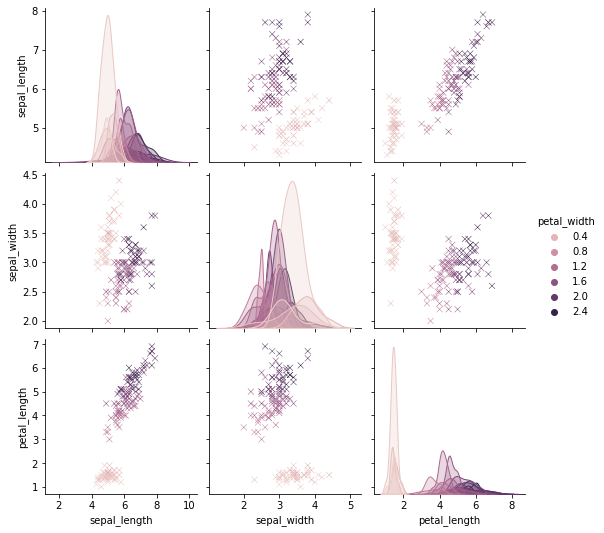

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(iris, hue='petal_width', markers='x', diag_kind="kde")

# (3) Spark를 사용하여 회귀분석하고 계수 출력

In [11]:
(trainDf, testDf) = irisDf.randomSplit([0.6, 0.4])
trainDf.count()

93

In [22]:
from pyspark.ml.feature import OneHotEncoder

encoder = OneHotEncoder(inputCol="petal_width", outputCol="petal_widthVec")

In [23]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = ["petal_widthVec", "sepal_length", "sepal_width", "petal_length"],
                                   outputCol = 'features')

In [24]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='petal_length', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [26]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[va, lr])

model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)

IllegalArgumentException: petal_widthVec does not exist. Available: sepal_length, sepal_width, petal_length, petal_width, species

# (4) 실제와 예측 출력

In [19]:
modelTestDf=model.transform(testDf)

NameError: name 'model' is not defined

# (5) 정확성 평가하고 출력

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="rmse")

In [ ]:
rmse=evaluator.evaluate(modelTestDf)

In [ ]:
f"Root Mean Squared Error (RMSE) on test data: {rmse:.3f}"

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="r2")

In [ ]:
f"r2: {evaluator.evaluate(modelTestDf):.3f}"